# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.7.1 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Loading the dataset

In [4]:
df = pd.read_csv('used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [5]:
df.shape

(3454, 15)

In [6]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [8]:
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [9]:
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

#### Univariate analysis

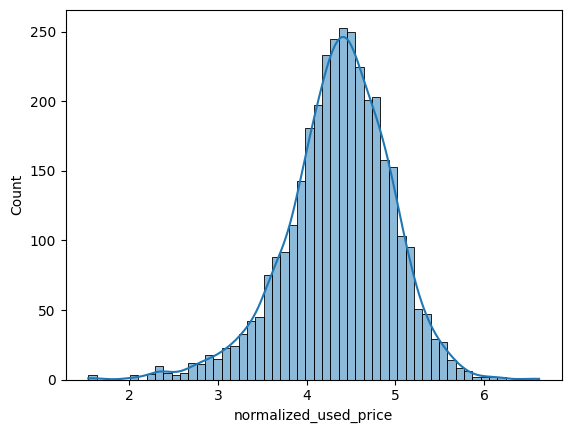

In [10]:
sns.histplot(data=df, x='normalized_used_price', kde=True);

##### the distribution of normalized used device price is approximately normal distribution. It's a bit left skewed.

<Axes: xlabel='normalized_new_price', ylabel='Count'>

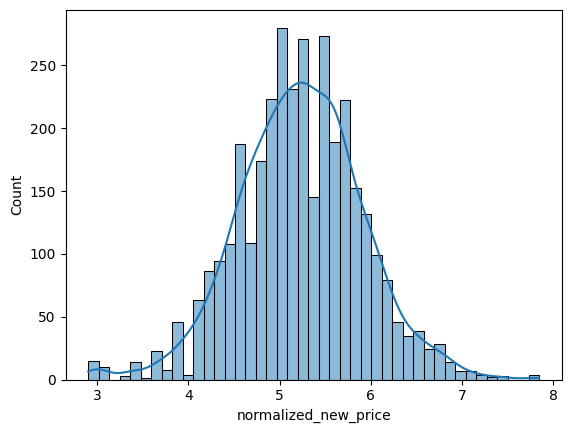

In [11]:
sns.histplot(data=df, x='normalized_new_price', kde=True)

##### the distribution of normalized new price is also a nearly normal distribution. Compared the distributions of new and used price, we can say that the slope of used price is steeper, which means the used price is more centralized, the new price is more varied and balanced.

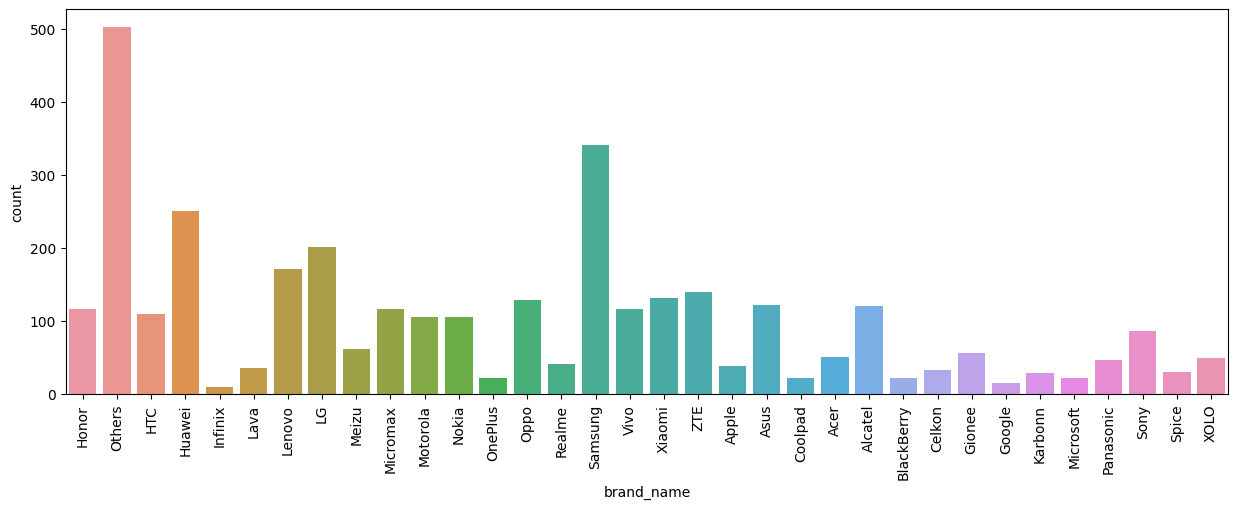

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='brand_name')
plt.xticks(rotation=90)
plt.show();

##### Huawei, Samsung, LG and Lenovo have large propotion in the used device market.

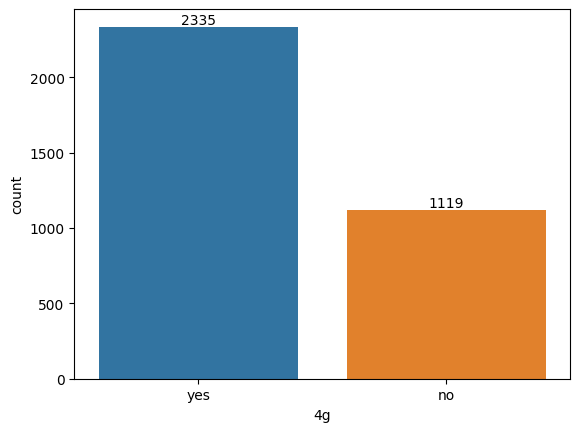

In [13]:
ax = sns.countplot(data=df, x='4g')
ax.bar_label(ax.containers[0]);

In [14]:
df['4g'].value_counts(dropna=False, normalize=True)

yes    0.676028
no     0.323972
Name: 4g, dtype: float64

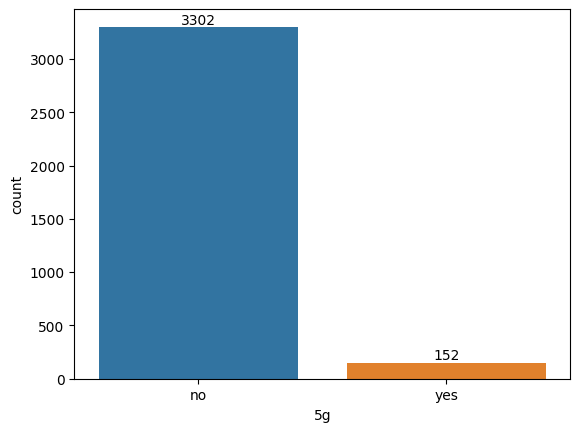

In [15]:
ax = sns.countplot(data=df, x='5g')
ax.bar_label(ax.containers[0]);

##### 67.6% of the used devices are available for 4g. Yet very few of the devices are available for 5g.

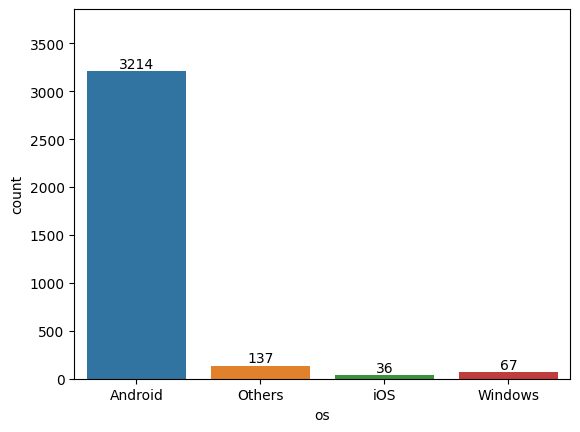

In [16]:
ax = sns.countplot(data=df, x='os')
ax.bar_label(ax.containers[0]);
ax.margins(y=0.2)

In [17]:
df['os'].value_counts(dropna=False, normalize=True)

Android    0.930515
Others     0.039664
Windows    0.019398
iOS        0.010423
Name: os, dtype: float64

##### 93% of used device market is dominated by Android devices.

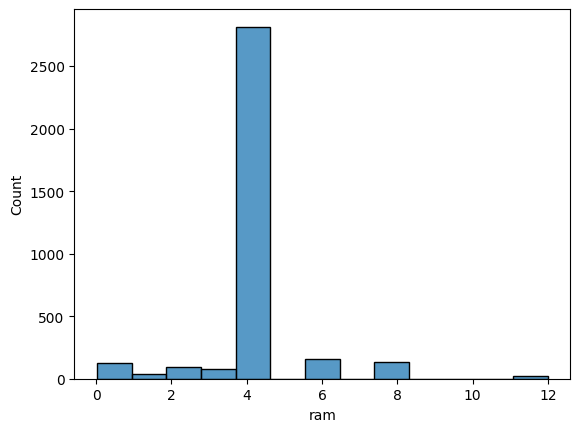

In [18]:
sns.histplot(data=df, x='ram');

In [19]:
df['ram'].value_counts(dropna=False, normalize=True)

4.00     0.814997
6.00     0.044586
8.00     0.037638
2.00     0.026057
0.25     0.024030
3.00     0.023451
1.00     0.009844
12.00    0.005211
0.02     0.005211
0.03     0.004922
0.50     0.002606
NaN      0.001158
1.50     0.000290
Name: ram, dtype: float64

##### 4GB RAM devices dominate the used device markets. 81.6% of the devices has a RAM of 4GB. It doesn't vary that much with brand.

In [20]:
df['screen_inch'] = df.screen_size / 2.54

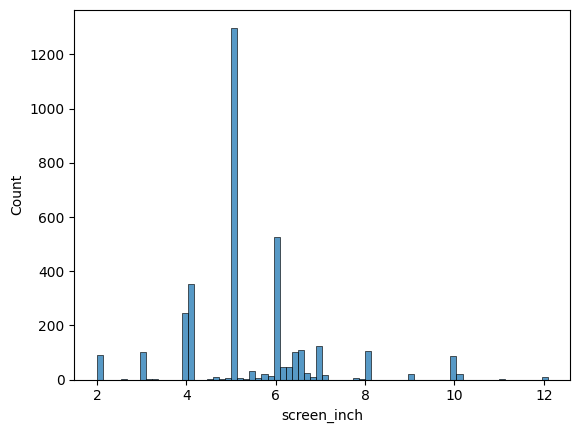

In [21]:
sns.histplot(data=df, x='screen_inch');

In [22]:
df[df.screen_inch > 6].shape[0] / df.shape[0]

0.3181818181818182

##### 32% of the used devices have a screen size larger than 6 inches.

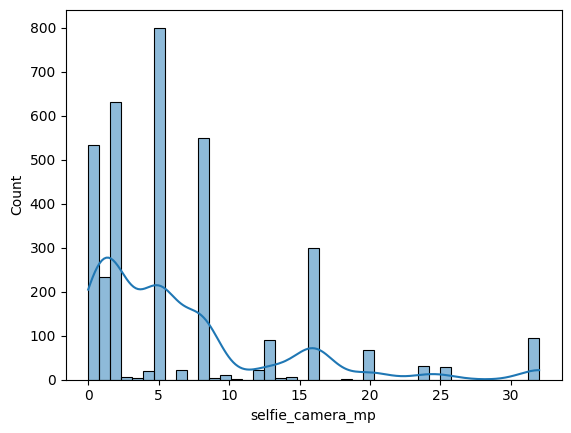

In [23]:
sns.histplot(data=df, x='selfie_camera_mp',kde=True);

##### Most of the resolution of selfie camera is less than 10MP, yet there is another peak around 17MP.

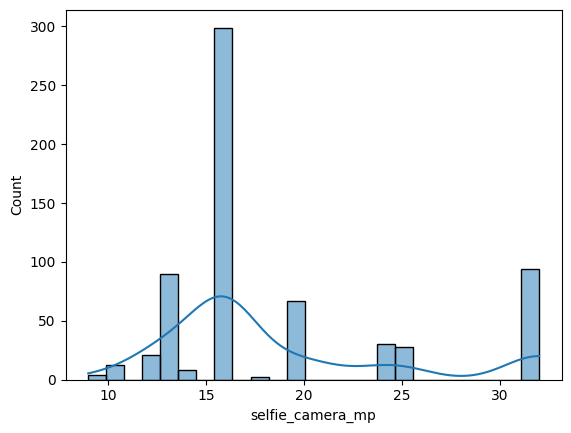

In [24]:
sns.histplot(data=df[df.selfie_camera_mp > 8], x='selfie_camera_mp', kde=True);

##### Devices that offer greater than 8MP selfie cameras have a distribution close to normal distribution, yet it has a long right tail, and right skewed.

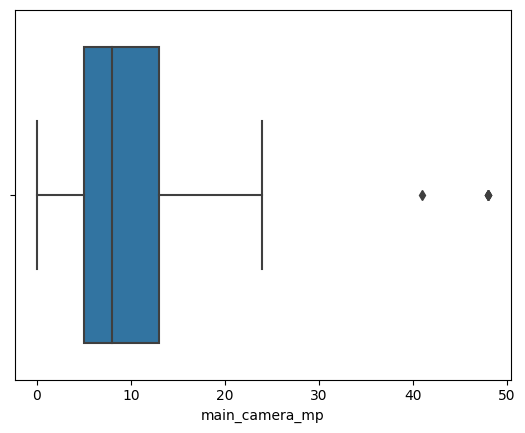

In [25]:
sns.boxplot(data=df, x='main_camera_mp');

##### 50% of the devices' rear camera resolution is less than 10MP. Except for several outlinears, all of their rear camera resolution is less than 25MP.

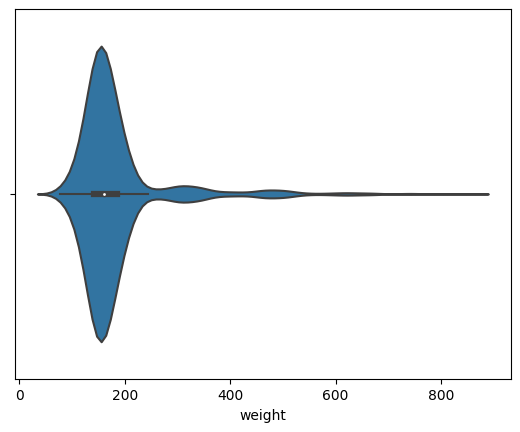

In [26]:
sns.violinplot(data=df, x='weight');

##### The distribution of weight is highly right skewed. 75% of the devices are less than 200 grams. Most of the devices'weight is less than 250 grams. Yet there are quite a few devices that are much heavier.

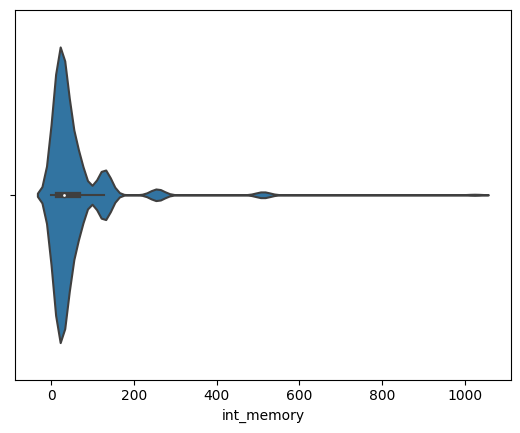

In [27]:
sns.violinplot(data=df, x='int_memory');

##### The distribution of internal memory is a lot like the weight. 75% of the used devices have a internal memory less than 100GB. Most of the devices' internal memory is less than 200GB. Yet there are quite a few devices that have much larger internal memory.

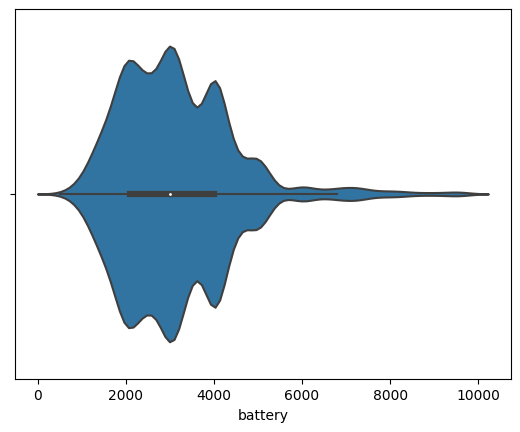

In [28]:
sns.violinplot(data=df, x='battery');

##### 75% of the devices' battery is lower than 4000 mAh.

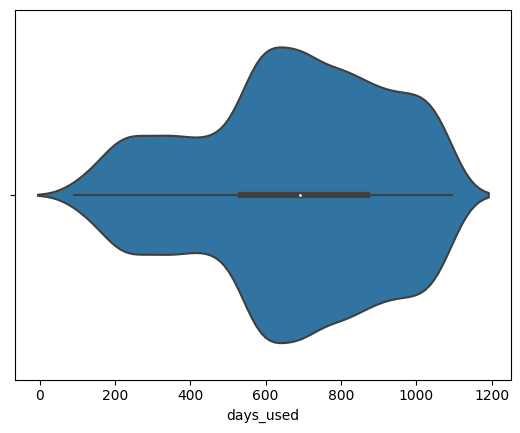

In [29]:
sns.violinplot(data=df, x='days_used');

##### 25% of the devices are used under 500 days, 50% of them are usded under 700 days, and 75% of them are used under 900days.

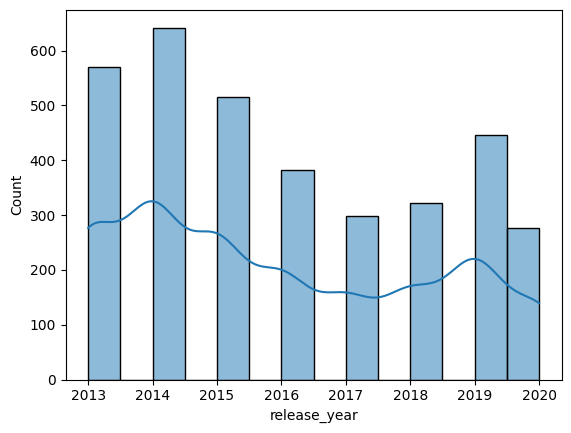

In [30]:
sns.histplot(data=df, x='release_year',kde=True);

##### All the devices are released between year 2013 to year 2020. 

#### Bivariate Analysis

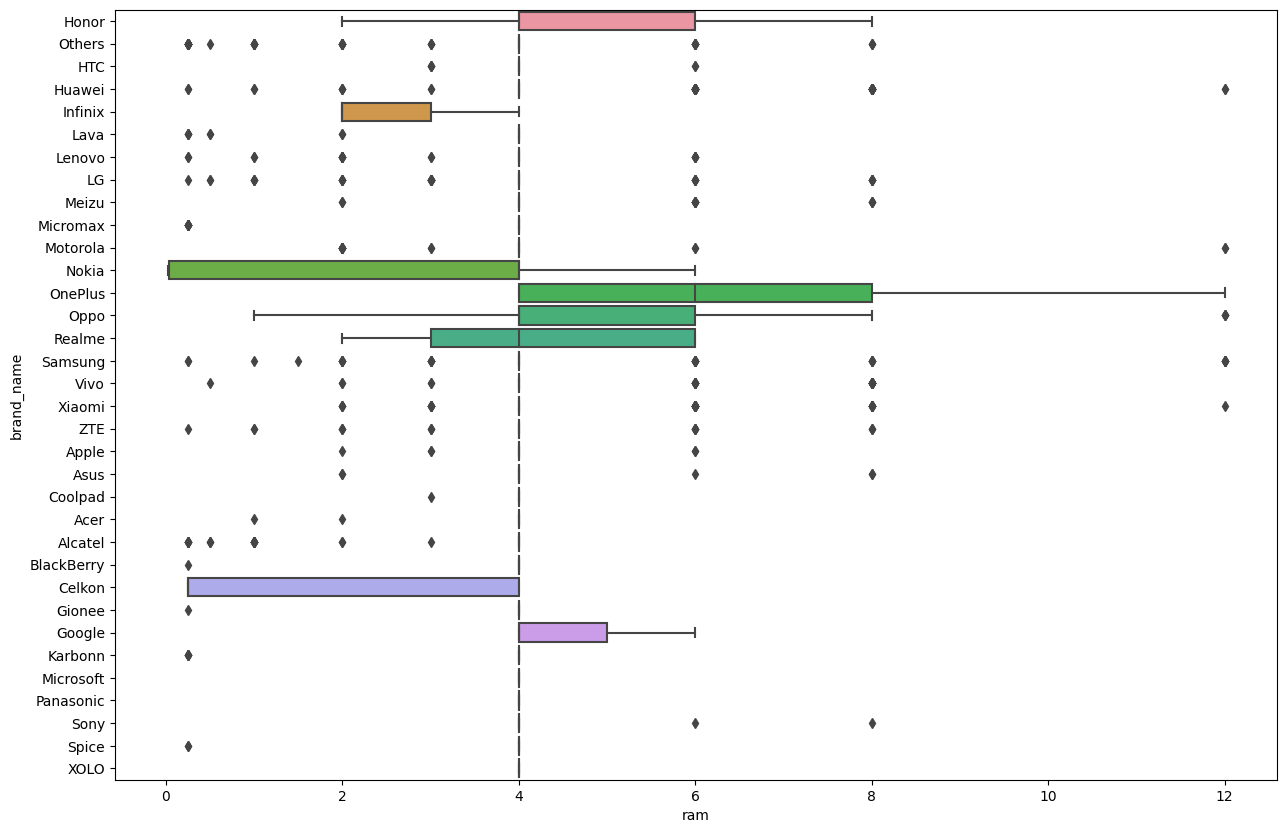

In [31]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x='ram', y='brand_name');

##### 1. Most of the large RAM devices(RAM above 4GB) come from Oneplus, Google, Oppo, Realme and Honor. OnePlus and Google only produce devices that have large RAM, either 4GB, or beyond 4GB. These two brand don't have small RAM devices in the used market. 
##### 2. Most of the small RAM devices(RAM below 4GB) are produced by Nokia, Celkon, Infinix, Oppo, Honor and Realme. Celkon, Infinix only have small RAM devices. 75% of nokia's devices have small RAM.
##### 3.Oppo,Realme and Honor produce both a portion of small RAM devices and a portion of Large RAM devices. 

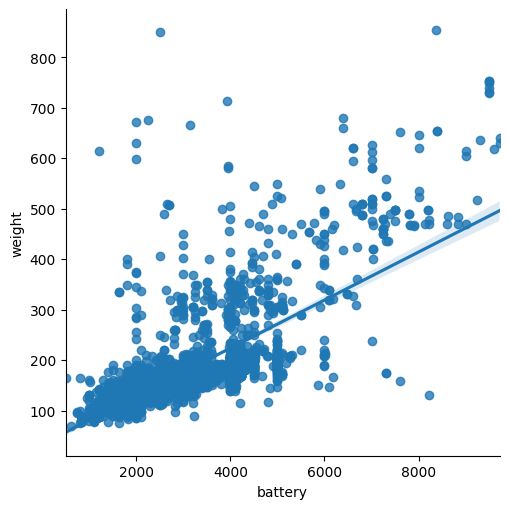

In [32]:
sns.lmplot(data=df, x='battery', y='weight');

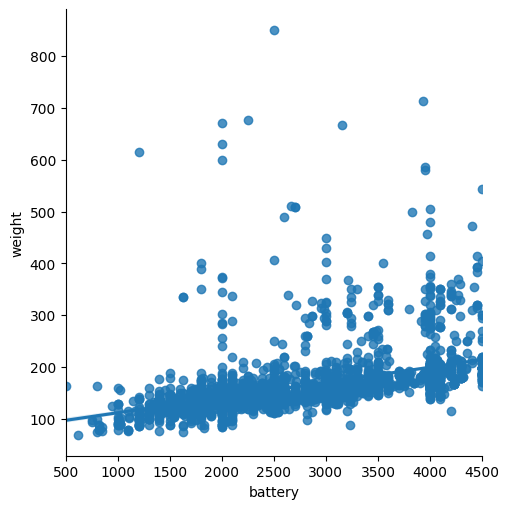

In [33]:
df1 = df[df.battery <= 4500]
sns.lmplot(data=df1, x='battery', y='weight');

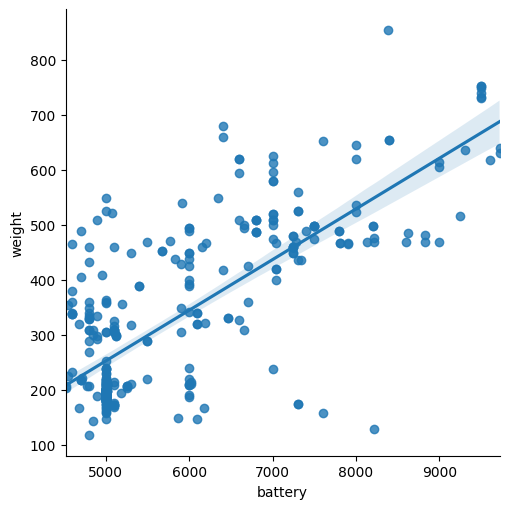

In [34]:
df_lb = df[df.battery > 4500]
sns.lmplot(data=df_lb, x='battery', y='weight');

##### For most of the devices that have batteries smaller than 4500 mAh, their weights have a clear linear relationship with the batteries.
##### For the devices that have batteries larger than 4500mAh, their weights and batteries have a positive correlation, yet it's not a clear linear relationship. 

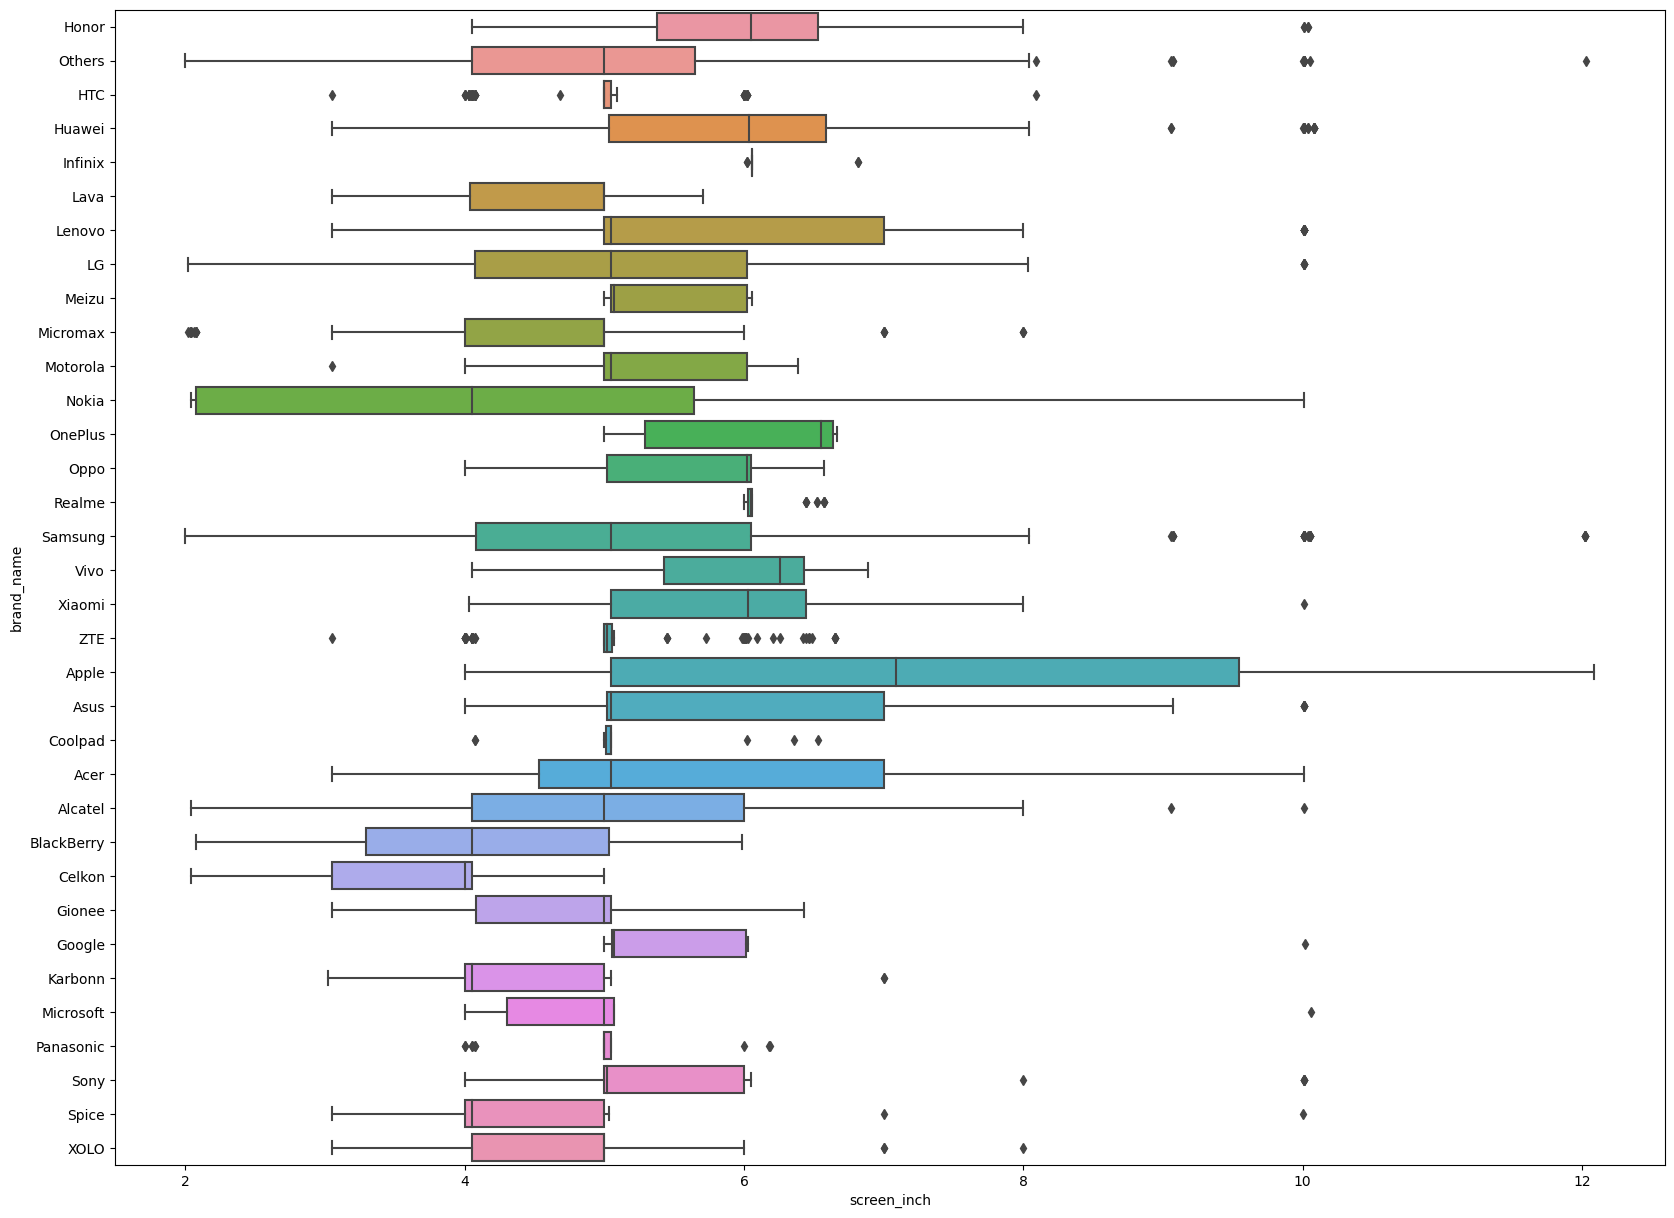

In [35]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df, x='screen_inch', y='brand_name');

In [36]:
df.drop('screen_inch',axis=1, inplace=True)

##### Most of the big screen devices are from Honor, Huawei, Lava, Lenovo, LG, Nokia,Oneplus, Oppo,Samsung, Vivo,Xiaomi, Apple, Asus, Acer, Alcatel, Realme. Among those brands, Realme only produce big screen devices, the least screen size of a Realme device is 6 inches.

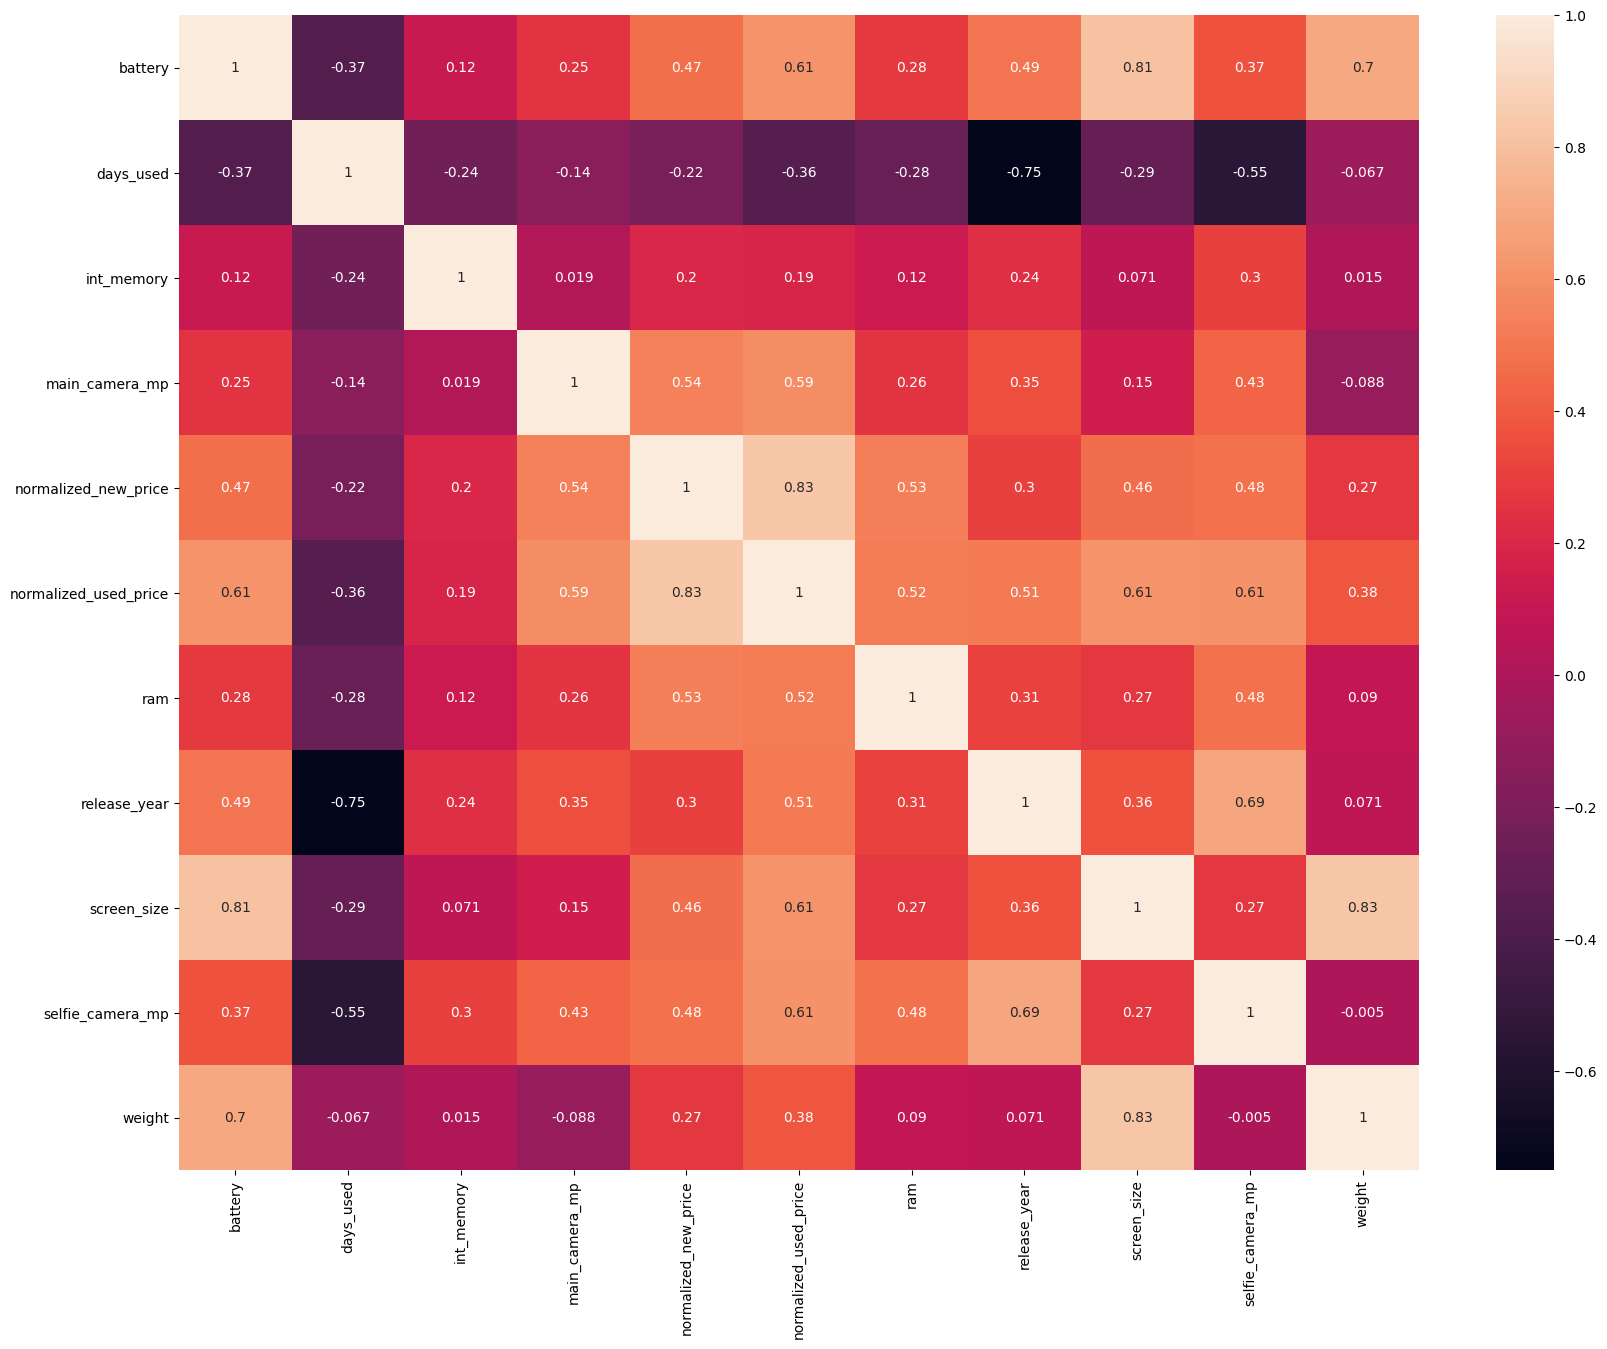

In [37]:
df_cat = df[['brand_name', 'os', '4g','5g']]
df_num = df[df.columns.difference(df_cat.columns)]
plt.figure(figsize=(20,15))
sns.heatmap(data=df_num.corr(), annot=True, cbar=True);

##### 1.The normalized price of a used device is highly corelated to its brand new price. it's also correlated with screen_size, the resolution of front and rear camera,battery. The ram and release year also can effect the normalized used price. 
##### 2.The interal memory, and weight are less correlated to the normalized price of a used device.

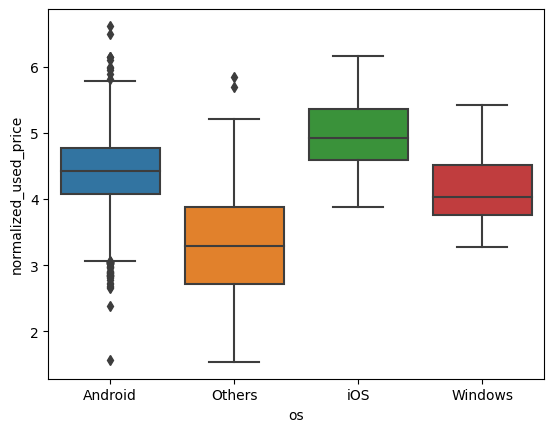

In [38]:
sns.boxplot(data=df, y='normalized_used_price', x='os');

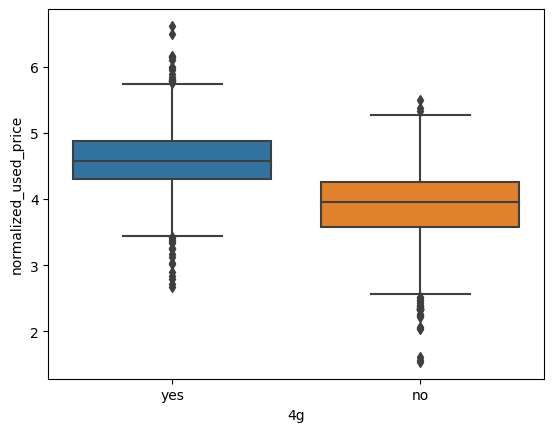

In [39]:
sns.boxplot(data=df, y='normalized_used_price', x='4g');

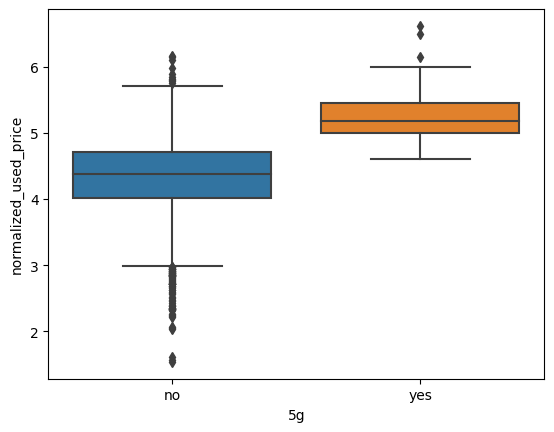

In [40]:
sns.boxplot(data=df, y='normalized_used_price', x='5g');

##### The operation system, wether it's 4g or 5g available, also correlate with the normalized price of a used device. The price will be higher if it has an iOS os, and supports 4g or 5g. 

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Missing value treatment

In [41]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [42]:
df['main_camera_mp'] = df['main_camera_mp'].fillna(value=df.groupby('brand_name')['main_camera_mp'].transform('median'))

In [43]:
df[df.main_camera_mp.isnull()]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
278,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,320,4.405133,4.605370
279,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.495913,4.702115
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,329,4.370713,4.487287
281,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,356,4.417997,4.605970
282,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,497,4.423289,4.866072


In [44]:
df['main_camera_mp'] = df['main_camera_mp'].fillna(value=df['main_camera_mp'].median())

In [45]:
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         2
int_memory               4
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [46]:
df['selfie_camera_mp'] = df['selfie_camera_mp'].fillna(value=df.groupby('brand_name')['selfie_camera_mp'].transform('median'))

In [47]:
df['int_memory'] = df['int_memory'].fillna(value=df.groupby('brand_name')['int_memory'].transform('median'))

In [48]:
df['ram'] = df['ram'].fillna(value=df.groupby('brand_name')['ram'].transform('median'))

In [49]:
df['battery'] = df['battery'].fillna(value=df.groupby('brand_name')['battery'].transform('median'))

In [50]:
df['weight'] = df['weight'].fillna(value=df.groupby('brand_name')['weight'].transform('median'))

In [51]:
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

#### Outlier detection and Feature Engineering

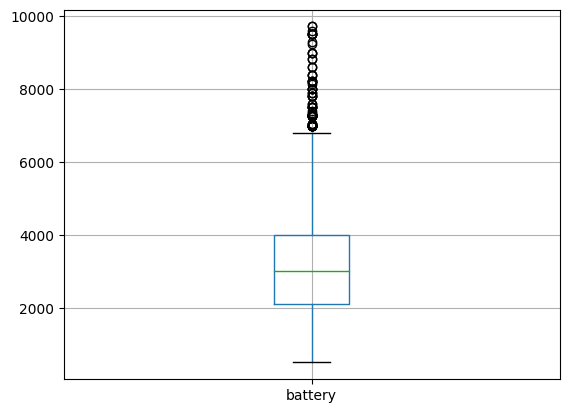

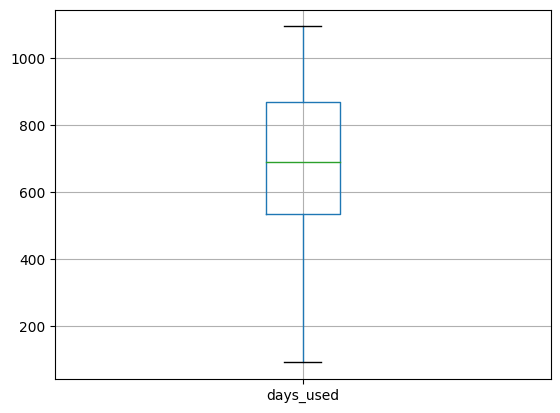

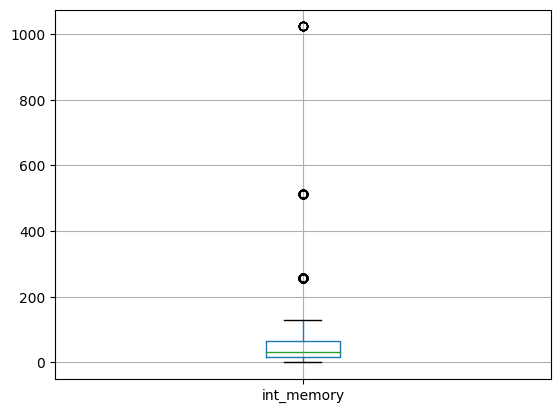

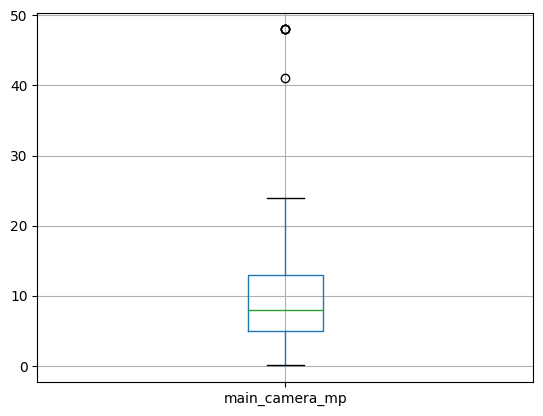

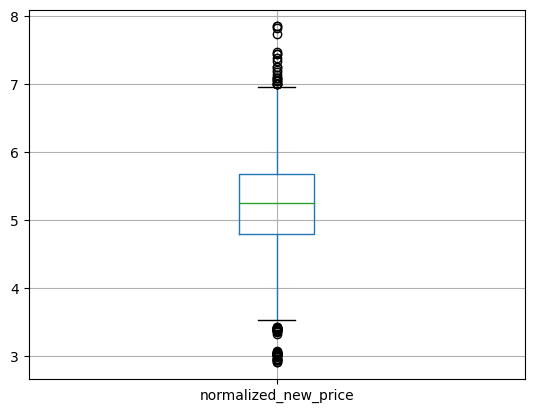

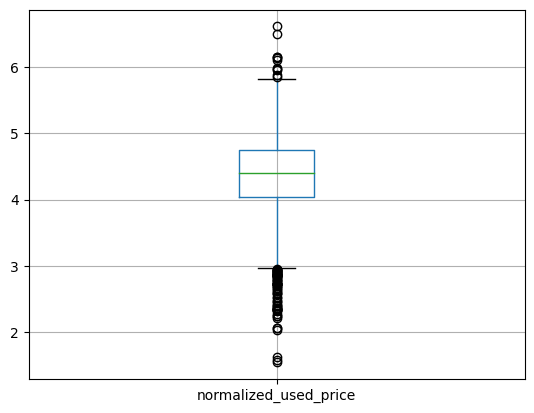

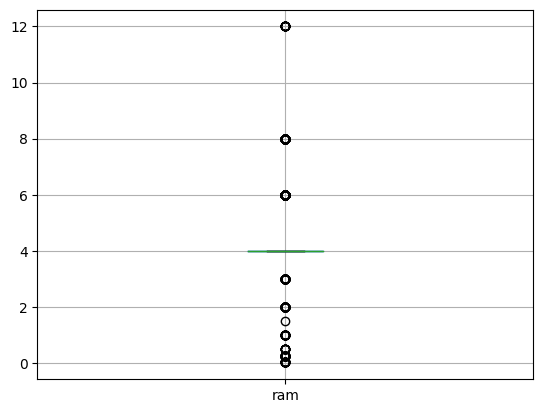

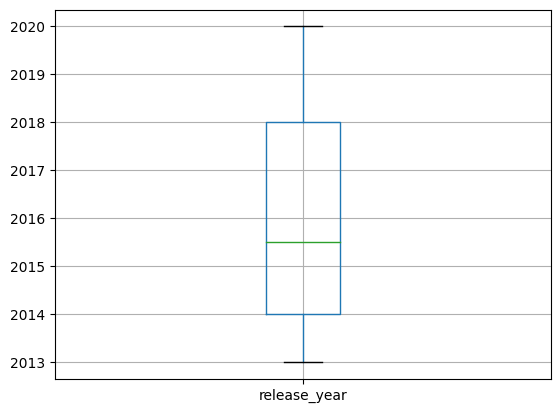

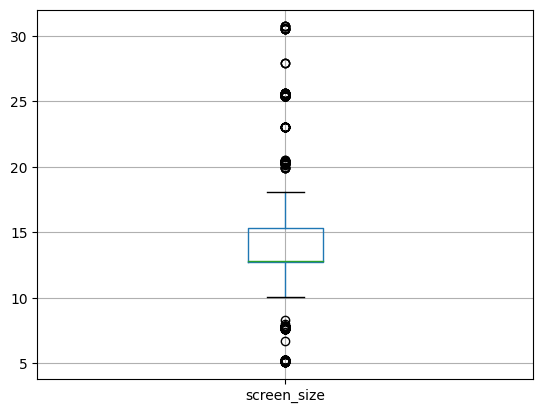

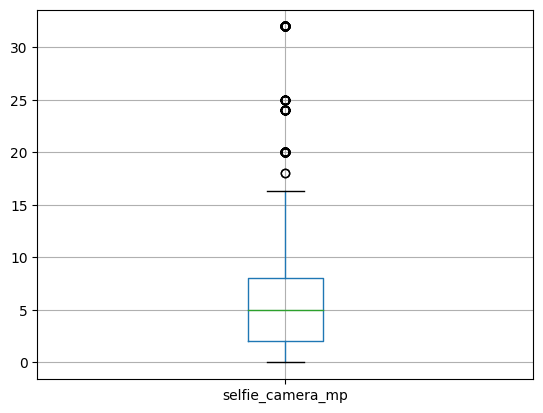

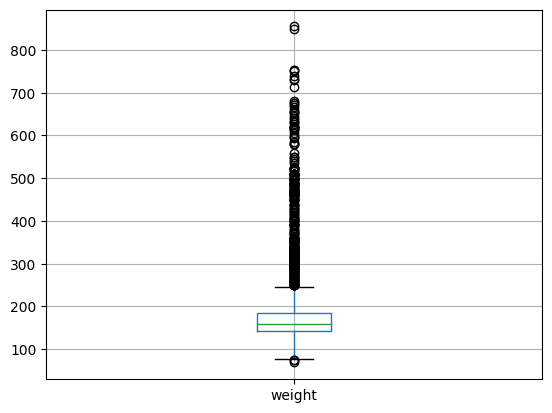

In [52]:
for column in df_num:
    plt.figure()
    df_num.boxplot([column])

##### 1.There are outliers in every nummeric columns, yet they're proper, so we'll keep them.
##### 2.There are too many values for the categorical variable brand_name, and the other variable os is a similiar trait. So wecan drop the brand_name, leave os.
##### 3.we'll create a new column named years_release,by taking the difference between the variable release_year and the current year. And drop the release_year, since it's not a real numerical variable.

In [53]:
df.drop(['brand_name'],axis=1,inplace=True)

In [54]:
df.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [55]:
import datetime
current_year = datetime.datetime.now().year
df['years_released'] = current_year - df['release_year'] 
df.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,years_released
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,4
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,4
3,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,4
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,4


In [56]:
df.drop(['release_year'], axis=1, inplace=True)

In [57]:
df.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_released
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,4
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,4
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,4
3,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,4
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,4


#### Preparing data for modeling

In [58]:
df = pd.get_dummies(df, columns=['os','4g','5g'], drop_first=True)

In [59]:
df.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_released,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,4,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,4,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,4,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,4,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,4,0,0,0,1,0


## EDA

- It is a good idea to explore the data once again after manipulating it.

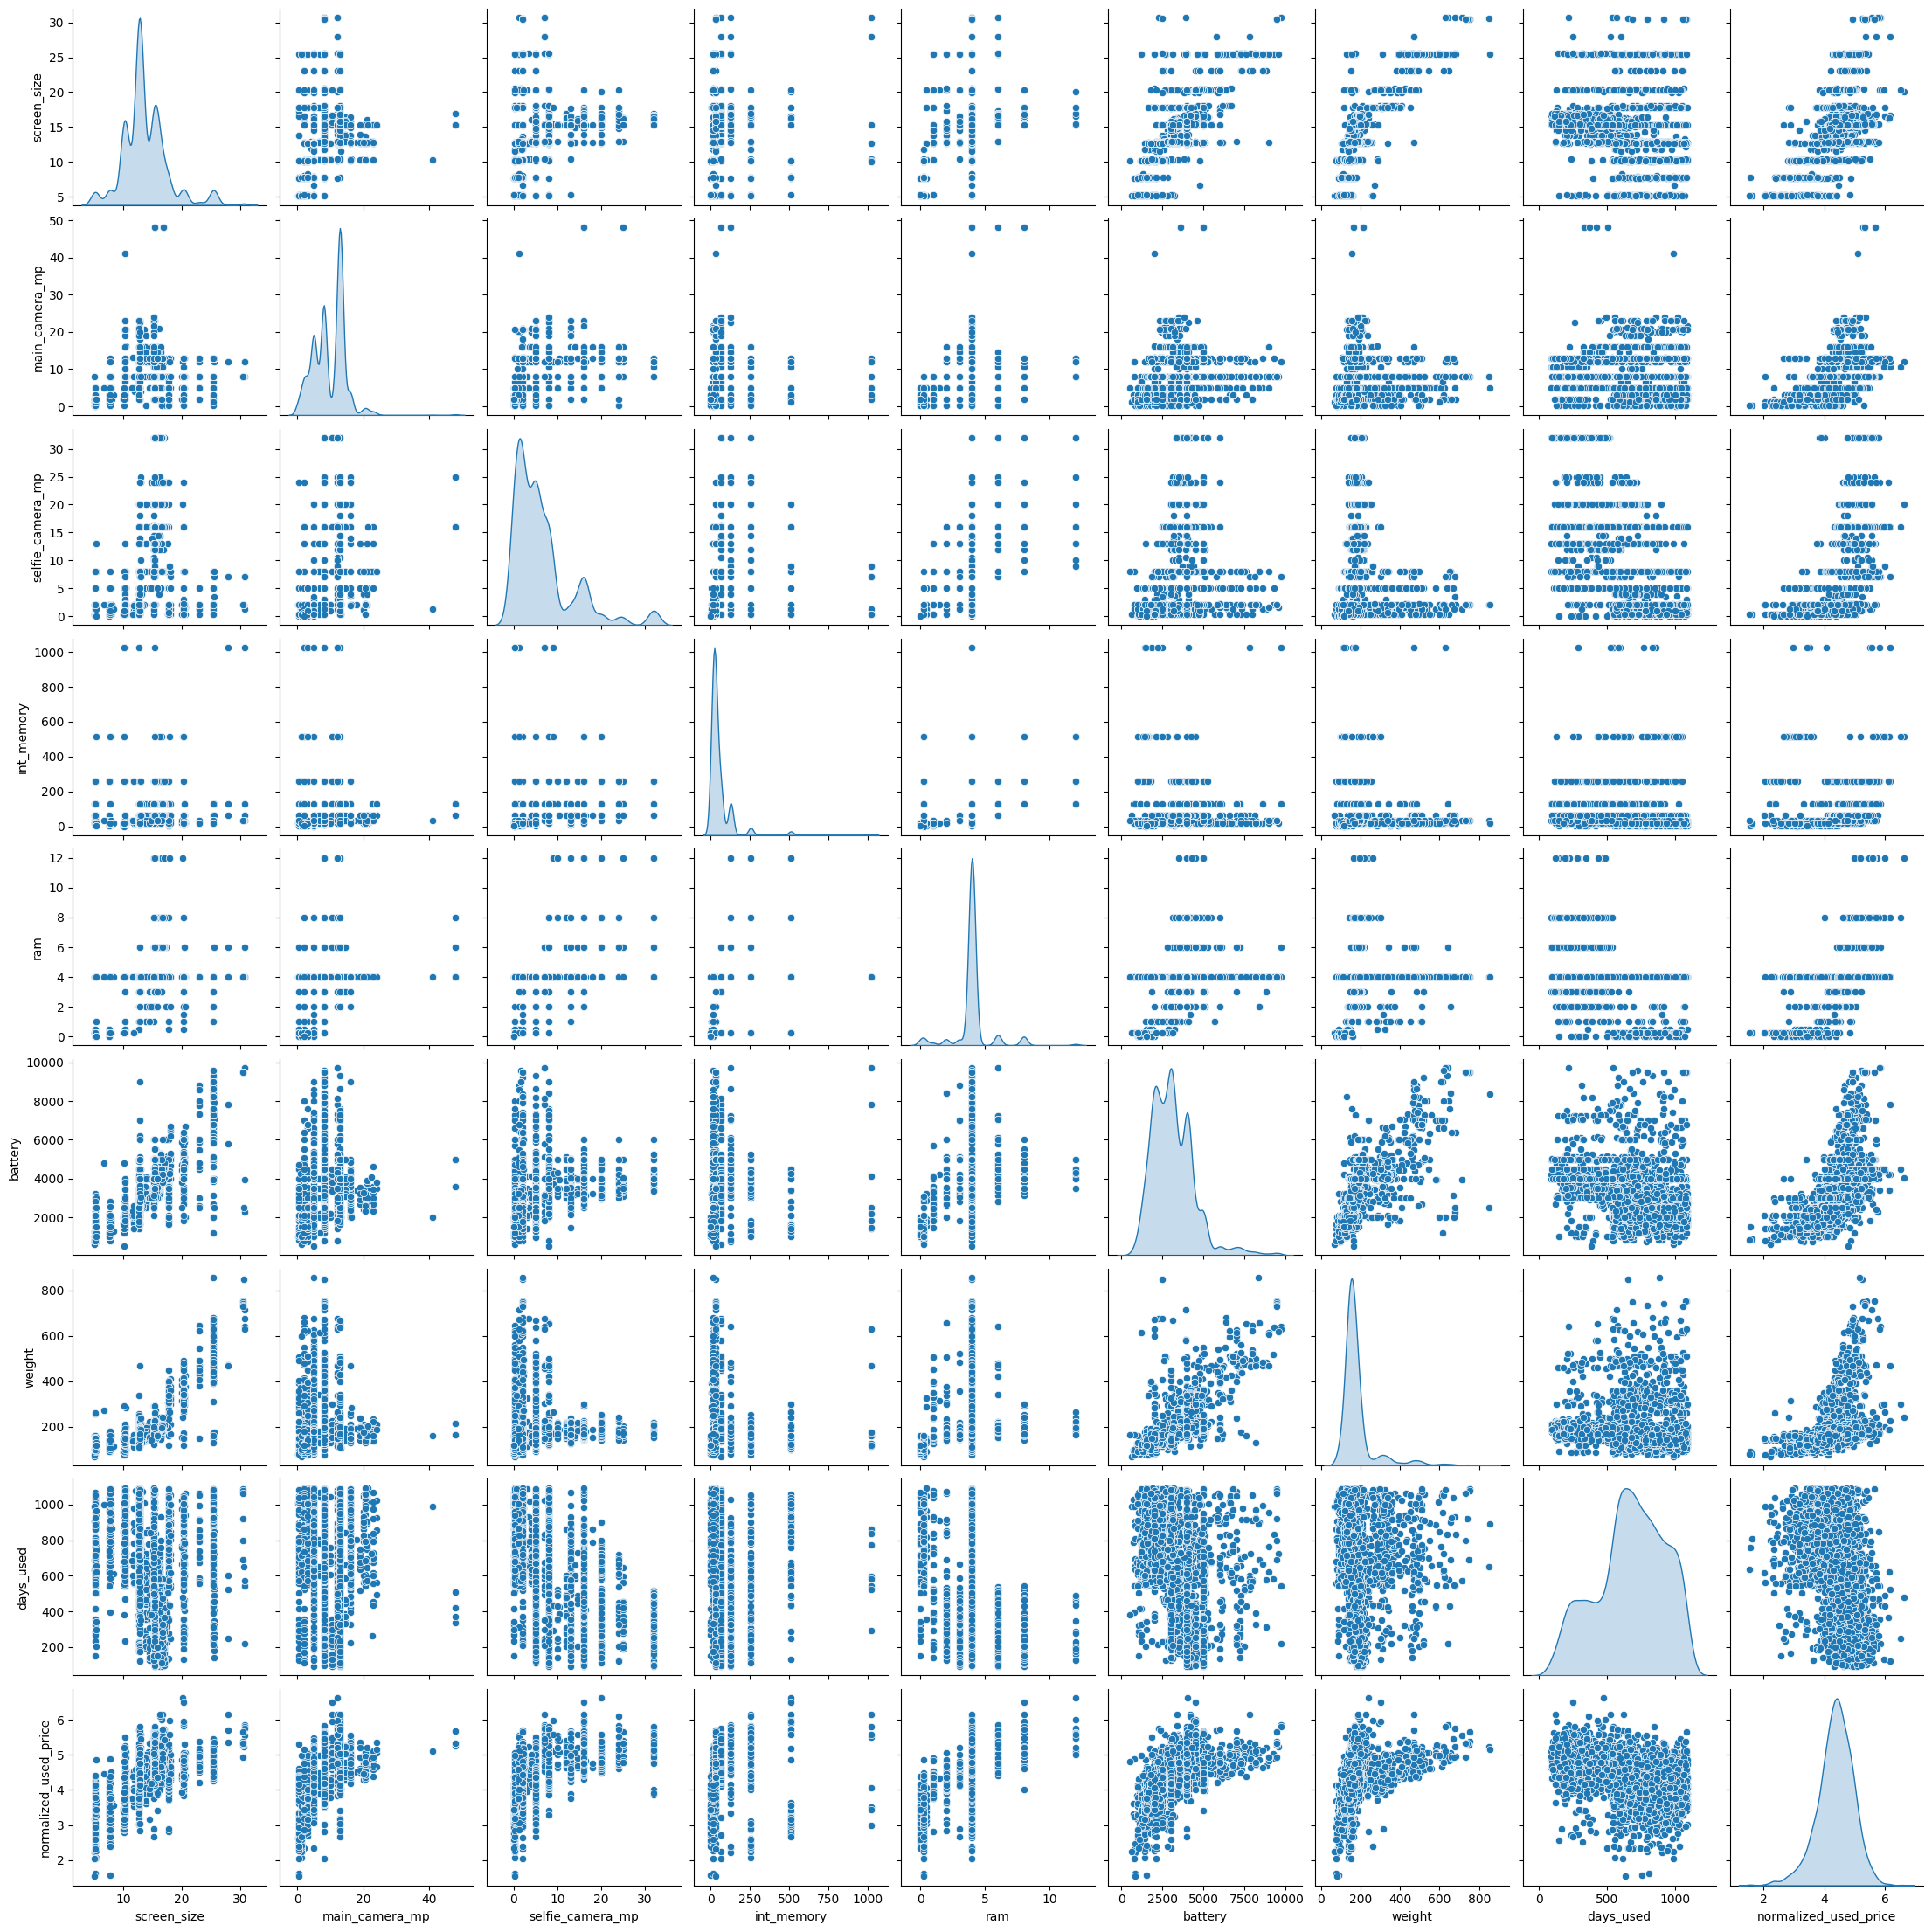

In [60]:
df_1 = df.iloc[:, 0:9]
df_2 = df.iloc[:, 8:df.shape[1]]
sns.pairplot(data=df_1, diag_kind='kde');

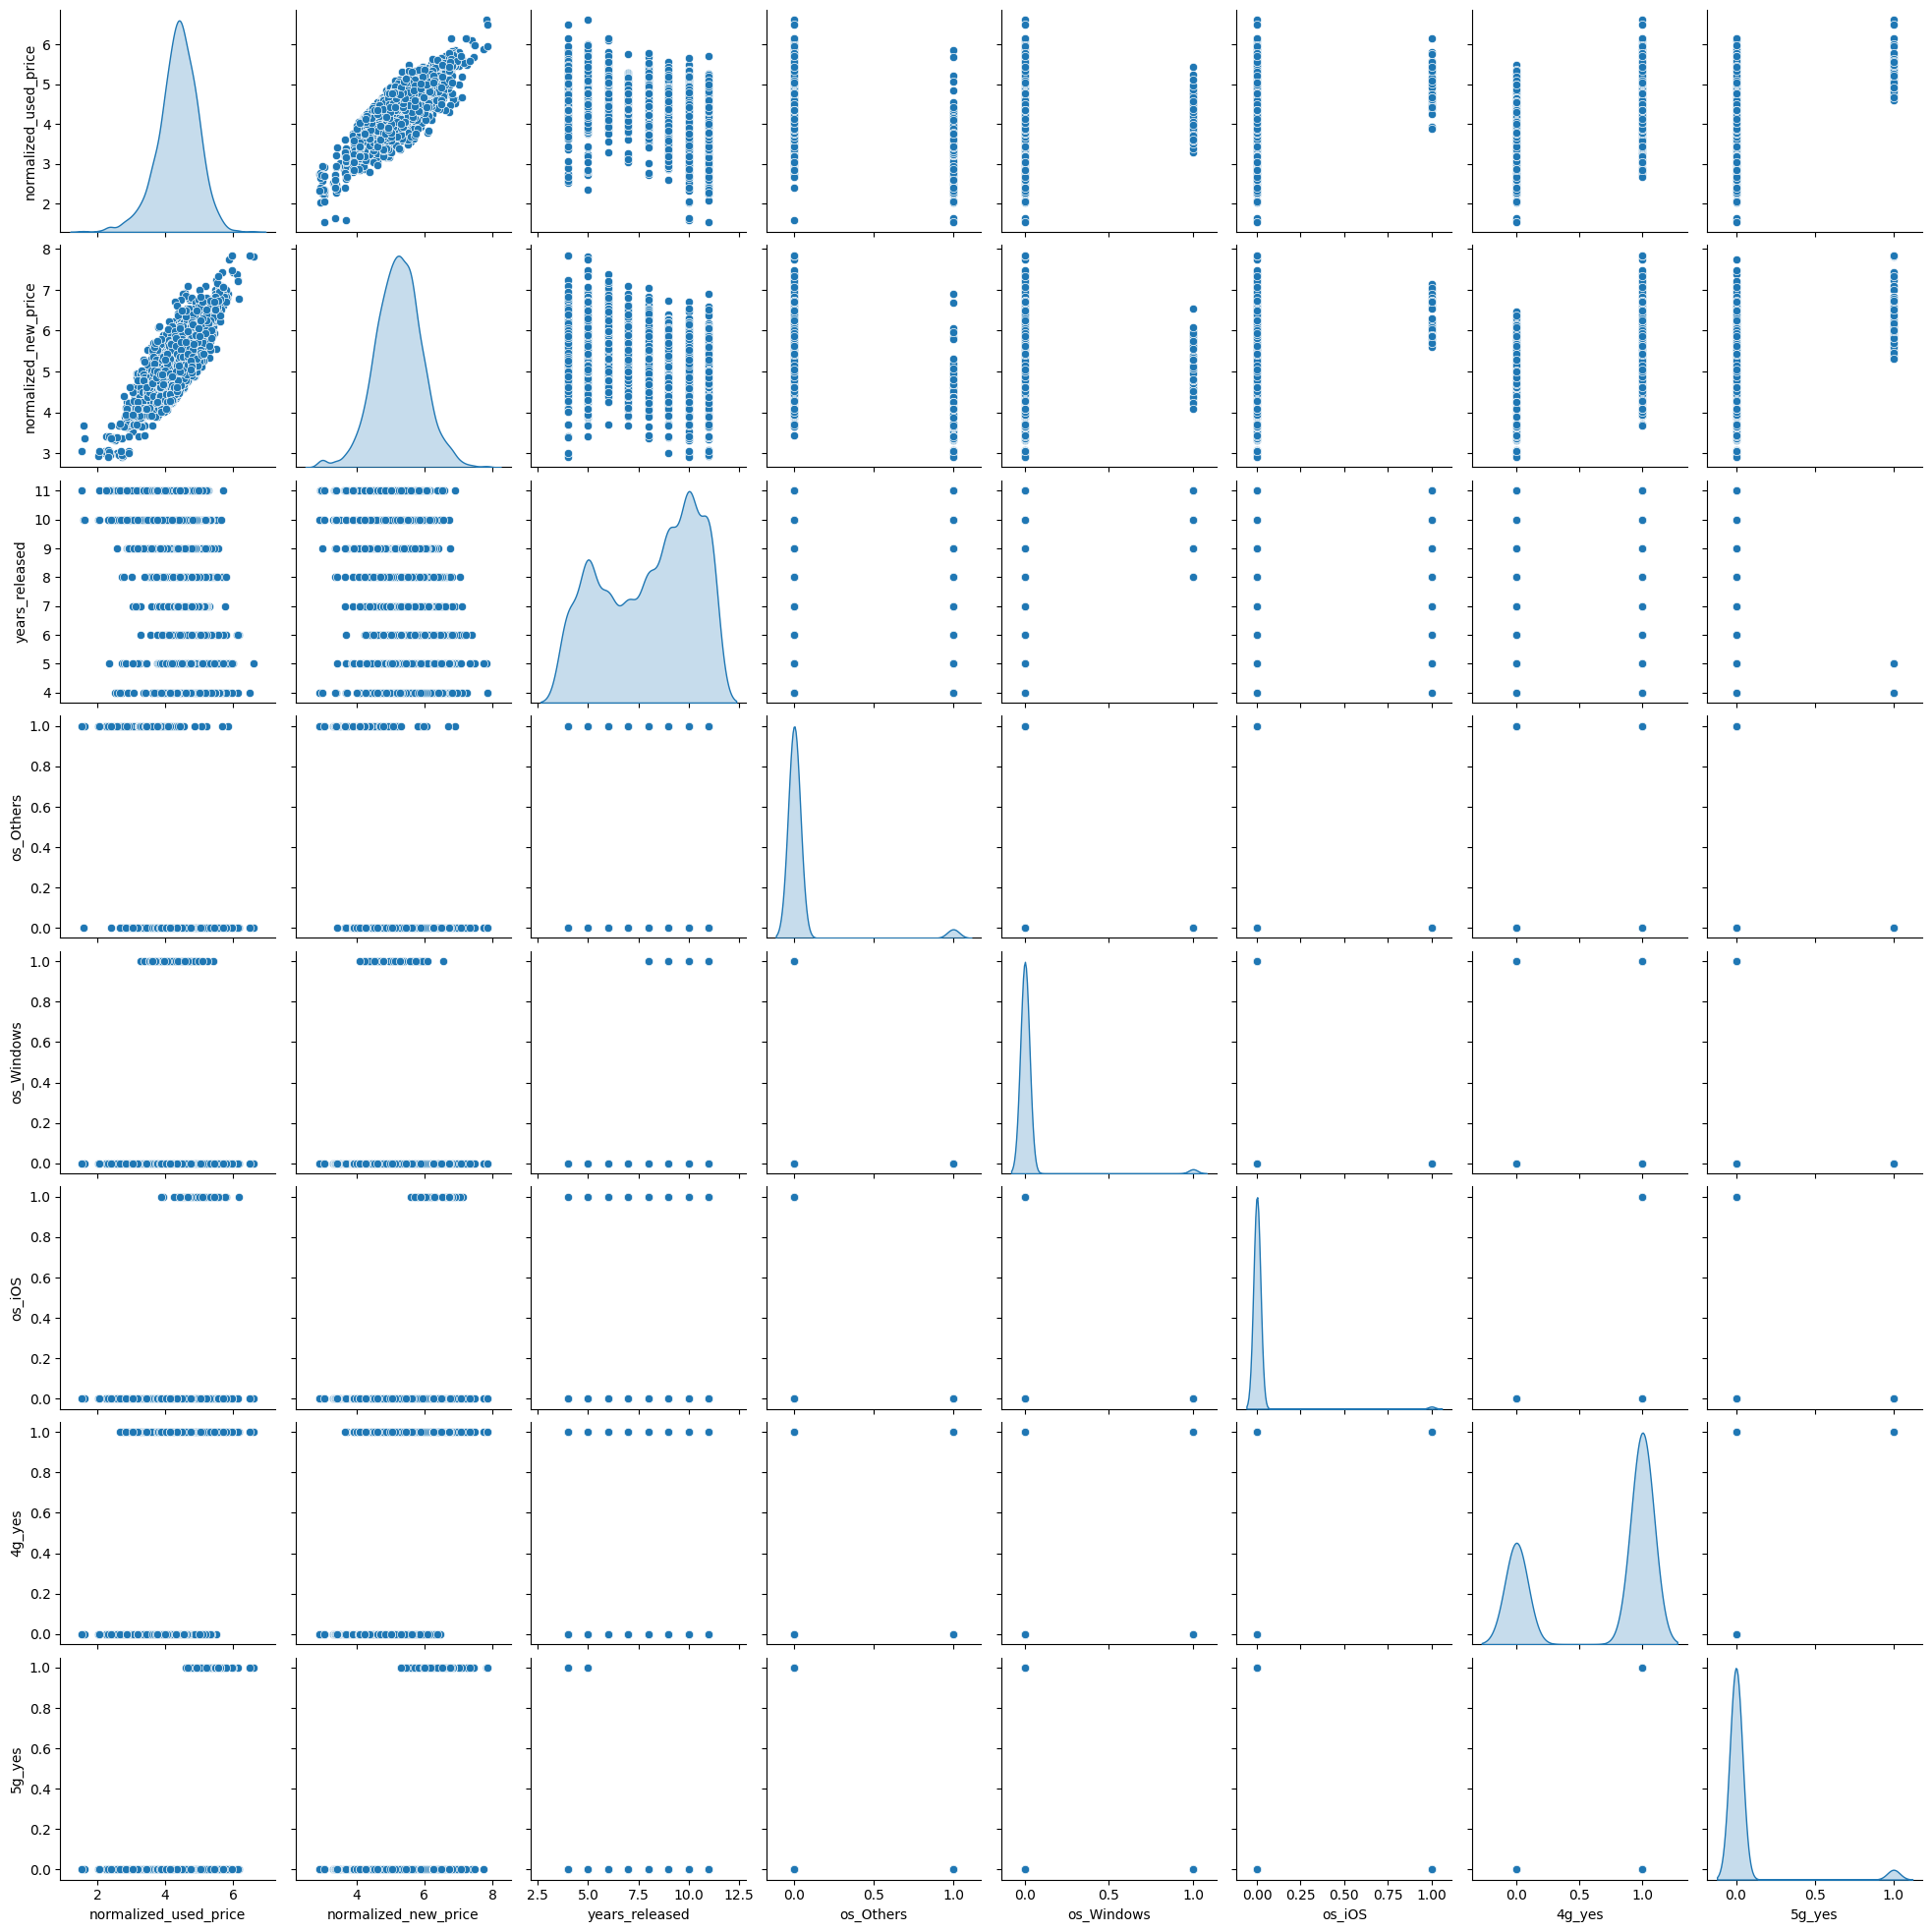

In [61]:
sns.pairplot(data=df_2, diag_kind='kde');

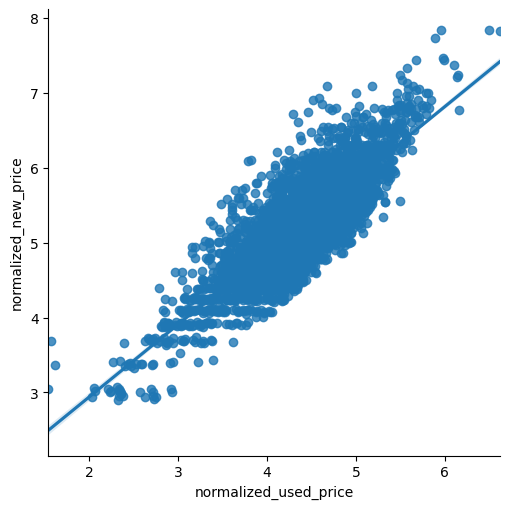

In [62]:
sns.lmplot(data=df, x='normalized_used_price', y='normalized_new_price');

##### the normalized_new_price atrait has a clear linear relationship with normalized_used_price.

## Model Building - Linear Regression

In [63]:
x = df.drop(['normalized_used_price'], axis=1)

In [64]:
y = df[['normalized_used_price']]

In [65]:
x = sm.add_constant(x)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1 )

In [67]:
x_train.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_released,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
3026,1.0,10.29,8.0,0.3,16.0,4.0,1800.0,120.0,819,4.796204,10,0,0,0,0,0
1525,1.0,15.34,13.0,5.0,32.0,4.0,4050.0,225.0,585,5.434595,8,0,0,0,1,0
1128,1.0,12.70,13.0,5.0,32.0,4.0,2550.0,162.0,727,5.137914,9,0,0,0,0,0
3003,1.0,12.83,8.0,5.0,16.0,4.0,3200.0,126.0,800,5.189228,9,0,0,0,1,0
2907,1.0,12.88,13.0,16.0,16.0,4.0,2900.0,160.0,560,5.016220,7,0,0,0,1,0


In [68]:
x_test.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_released,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
866,1.0,15.24,8.00,2.0,16.0,4.00,3000.0,206.0,632,5.190788,10,0,0,0,0,0
957,1.0,10.16,3.15,0.3,512.0,0.25,1400.0,140.0,637,3.884652,11,0,0,0,0,0
280,1.0,15.39,8.00,8.0,32.0,2.00,5000.0,185.0,329,4.487287,4,0,0,0,1,0
2150,1.0,12.83,13.00,16.0,64.0,4.00,3200.0,148.0,648,5.639422,7,0,0,0,1,0
93,1.0,15.29,13.00,5.0,32.0,3.00,3500.0,179.0,216,5.300415,5,0,0,0,1,0


In [69]:
olsres = sm.OLS(y_train, x_train.astype(float)).fit()

In [70]:
olsres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     850.9
Date:                   Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                           18:32:57   Log-Likelihood:                 99.010
No. Observations:                   2417   AIC:                            -166.0
Df Residuals:                       2401   BIC:                            -73.38
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.4464      0.057     25.399      0.000       1.335       1.558
screen_size              0.0253      0.003      7.632      0.000       0.019       0.032
main_camera_mp           0.0209      0.001     14.827      0.000       0.018       0.024
selfie_camera_mp         0.0139      0.001     12.856      0.000       0.012       0.016
int_memory            9.942e-05    6.7e-05      1.485      0.138   -3.19e-05       0.000
ram                      0.0209      0.005      4.204      0.000       0.011       0.031
battery              -1.292e-05   7.09e-06     -1.822      0.069   -2.68e-05    9.83e-07
weight                   0.0009      0.000      7.182      0.000       0.001       0.001
days_used             4.632e-05   3.05e-05      1.520      0.129   -1.35e-05       0.000
normalized_new_price     0.4212      0.011     37.243      0.000       0.399       0.443
years_released          -0.0254      0.004     -5.723      0.000      -0.034      -0.017
os_Others               -0.0494      0.029     -1.682      0.093      -0.107       0.008
os_Windows               0.0265      0.036      0.731      0.465      -0.045       0.098
os_iOS                  -0.0617      0.045     -1.381      0.168      -0.149       0.026
4g_yes                   0.0479      0.015      3.146      0.002       0.018       0.078
5g_yes                  -0.0516      0.031     -1.677      0.094      -0.112       0.009
==============================================================================
Omnibus:                      236.006   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              461.060
Skew:                          -0.637   Prob(JB):                    7.62e-101
Kurtosis:                       4.719   Cond. No.                     4.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### R-squared value is 0.842, which means that this model can explain 84.2% of the variance in the trainning data.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

#### check for Multicollinearity

In [71]:
x_train.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'battery', 'weight', 'days_used',
       'normalized_new_price', 'years_released', 'os_Others', 'os_Windows',
       'os_iOS', '4g_yes', '5g_yes'],
      dtype='object')

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index = x_train.columns
)
vif_series1

const                   144.336865
screen_size               7.245113
main_camera_mp            1.996797
selfie_camera_mp          2.574307
int_memory                1.248413
ram                       2.101931
battery                   3.848673
weight                    6.127540
days_used                 2.577974
normalized_new_price      2.633986
years_released            4.625563
os_Others                 1.477161
os_Windows                1.023349
os_iOS                    1.089151
4g_yes                    2.261037
5g_yes                    1.721883
dtype: float64

##### 1. There are 2 columns with vif between 5 to 10, which indicate moderate multicolineartiy. There is no column with higheer vif.
##### 2. These two columns are screen_size and weight. We'll drop them one by one, to remove multicolinearity.

In [73]:
#drop screen_size
x_train1 = x_train.drop(['screen_size'], axis=1)
olsres1 = sm.OLS(y_train, x_train1).fit()

In [74]:
#drop weight
x_train2 = x_train.drop(['weight'], axis=1)
olsres2 = sm.OLS(y_train, x_train2).fit()

In [75]:
res = pd.DataFrame(
    {
        'R-squared': [olsres.rsquared, olsres1.rsquared, olsres2.rsquared],
        'Adjusted R': [olsres.rsquared, olsres1.rsquared_adj, olsres2.rsquared]
    }
)
res

,R-squared,Adjusted R
0,0.841664,0.841664
1,0.837823,0.836878
2,0.838262,0.838262


##### We'll drop weight, since it has the least impact on adjusted r-squared of the model.

In [76]:
x_train.drop(['weight'], axis=1, inplace=True)

In [77]:
vif_series2 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index = x_train.columns
)
vif_series2

const                   122.792417
screen_size               3.402025
main_camera_mp            1.903614
selfie_camera_mp          2.540251
int_memory                1.248068
ram                       2.098331
battery                   3.469506
days_used                 2.564790
normalized_new_price      2.627620
years_released            4.464757
os_Others                 1.360382
os_Windows                1.022632
os_iOS                    1.080968
4g_yes                    2.240142
5g_yes                    1.720371
dtype: float64

##### All the vif value is smaller than 5, which means that we've removed  the multicolinearity.

In [78]:
olsres3 = sm.OLS(y_train, x_train).fit()
olsres3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     889.2
Date:                   Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                           18:32:58   Log-Likelihood:                 73.321
No. Observations:                   2417   AIC:                            -116.6
Df Residuals:                       2402   BIC:                            -29.79
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2883      0.053     24.274      0.000       1.184       1.392
screen_size              0.0427      0.002     18.577      0.000       0.038       0.047
main_camera_mp           0.0187      0.001     13.455      0.000       0.016       0.021
selfie_camera_mp         0.0130      0.001     11.985      0.000       0.011       0.015
int_memory            9.143e-05   6.76e-05      1.352      0.177   -4.12e-05       0.000
ram                      0.0194      0.005      3.870      0.000       0.010       0.029
battery               3.062e-06    6.8e-06      0.450      0.652   -1.03e-05    1.64e-05
days_used             6.198e-05   3.07e-05      2.017      0.044    1.73e-06       0.000
normalized_new_price     0.4251      0.011     37.251      0.000       0.403       0.448
years_released          -0.0195      0.004     -4.416      0.000      -0.028      -0.011
os_Others                0.0099      0.028      0.348      0.728      -0.046       0.066
os_Windows               0.0334      0.037      0.911      0.362      -0.038       0.105
os_iOS                  -0.0339      0.045     -0.753      0.451      -0.122       0.054
4g_yes                   0.0374      0.015      2.441      0.015       0.007       0.067
5g_yes                  -0.0451      0.031     -1.450      0.147      -0.106       0.016
==============================================================================
Omnibus:                      221.819   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.956
Skew:                          -0.618   Prob(JB):                     4.75e-91
Kurtosis:                       4.613   Cond. No.                     4.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### os_Other's p value is > 0.05, and it's the highest p value, so we'll drop this variable and check again.

In [79]:
x_train.drop(['os_Others'], axis=1, inplace=True)

In [80]:
olsres4 = sm.OLS(y_train, x_train).fit()
olsres4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     958.0
Date:                   Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                           18:32:58   Log-Likelihood:                 73.260
No. Observations:                   2417   AIC:                            -118.5
Df Residuals:                       2403   BIC:                            -37.46
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2946      0.050     25.932      0.000       1.197       1.392
screen_size              0.0425      0.002     19.229      0.000       0.038       0.047
main_camera_mp           0.0186      0.001     13.580      0.000       0.016       0.021
selfie_camera_mp         0.0130      0.001     12.009      0.000       0.011       0.015
int_memory            9.187e-05   6.76e-05      1.359      0.174   -4.07e-05       0.000
ram                      0.0190      0.005      3.902      0.000       0.009       0.029
battery               3.428e-06   6.72e-06      0.510      0.610   -9.74e-06    1.66e-05
days_used             6.128e-05   3.07e-05      1.999      0.046    1.17e-06       0.000
normalized_new_price     0.4249      0.011     37.299      0.000       0.403       0.447
years_released          -0.0195      0.004     -4.414      0.000      -0.028      -0.011
os_Windows               0.0330      0.037      0.900      0.368      -0.039       0.105
os_iOS                  -0.0334      0.045     -0.744      0.457      -0.122       0.055
4g_yes                   0.0373      0.015      2.432      0.015       0.007       0.067
5g_yes                  -0.0438      0.031     -1.418      0.156      -0.104       0.017
==============================================================================
Omnibus:                      221.620   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              419.185
Skew:                          -0.615   Prob(JB):                     9.44e-92
Kurtosis:                       4.628   Cond. No.                     3.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### we'll keep dropping next variable which has the higest p value --- battery.

In [81]:
x_train.drop(['battery'], axis=1, inplace=True)

In [82]:
olsres5 = sm.OLS(y_train, x_train).fit()
olsres5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1038.
Date:                   Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                           18:32:58   Log-Likelihood:                 73.129
No. Observations:                   2417   AIC:                            -120.3
Df Residuals:                       2404   BIC:                            -44.98
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2939      0.050     25.931      0.000       1.196       1.392
screen_size              0.0433      0.002     28.594      0.000       0.040       0.046
main_camera_mp           0.0187      0.001     13.595      0.000       0.016       0.021
selfie_camera_mp         0.0130      0.001     12.010      0.000       0.011       0.015
int_memory            9.166e-05   6.76e-05      1.356      0.175   -4.09e-05       0.000
ram                      0.0189      0.005      3.889      0.000       0.009       0.028
days_used             6.113e-05   3.06e-05      1.995      0.046    1.03e-06       0.000
normalized_new_price     0.4254      0.011     37.464      0.000       0.403       0.448
years_released          -0.0198      0.004     -4.526      0.000      -0.028      -0.011
os_Windows               0.0317      0.037      0.868      0.385      -0.040       0.103
os_iOS                  -0.0337      0.045     -0.749      0.454      -0.122       0.054
4g_yes                   0.0380      0.015      2.489      0.013       0.008       0.068
5g_yes                  -0.0436      0.031     -1.414      0.157      -0.104       0.017
==============================================================================
Omnibus:                      221.164   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              418.694
Skew:                          -0.613   Prob(JB):                     1.21e-91
Kurtosis:                       4.629   Cond. No.                     7.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
x_train.drop(['os_iOS'], axis=1, inplace=True)
olsres6 = sm.OLS(y_train, x_train).fit()
olsres6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1133.
Date:                   Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                           18:32:58   Log-Likelihood:                 72.846
No. Observations:                   2417   AIC:                            -121.7
Df Residuals:                       2405   BIC:                            -52.21
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2997      0.049     26.367      0.000       1.203       1.396
screen_size              0.0433      0.002     28.588      0.000       0.040       0.046
main_camera_mp           0.0188      0.001     13.748      0.000       0.016       0.021
selfie_camera_mp         0.0131      0.001     12.147      0.000       0.011       0.015
int_memory            9.134e-05   6.76e-05      1.351      0.177   -4.12e-05       0.000
ram                      0.0192      0.005      3.946      0.000       0.010       0.029
days_used             6.086e-05   3.06e-05      1.986      0.047    7.78e-07       0.000
normalized_new_price     0.4236      0.011     38.181      0.000       0.402       0.445
years_released          -0.0196      0.004     -4.494      0.000      -0.028      -0.011
os_Windows               0.0319      0.037      0.875      0.382      -0.040       0.104
4g_yes                   0.0376      0.015      2.469      0.014       0.008       0.068
5g_yes                  -0.0428      0.031     -1.387      0.165      -0.103       0.018
==============================================================================
Omnibus:                      221.289   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              418.713
Skew:                          -0.614   Prob(JB):                     1.20e-91
Kurtosis:                       4.628   Cond. No.                     7.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
x_train.drop(['os_Windows'], axis=1, inplace=True)

In [85]:
olsres7 = sm.OLS(y_train, x_train).fit()
olsres7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1246.
Date:                   Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                           18:32:58   Log-Likelihood:                 72.462
No. Observations:                   2417   AIC:                            -122.9
Df Residuals:                       2406   BIC:                            -59.23
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2995      0.049     26.364      0.000       1.203       1.396
screen_size              0.0433      0.002     28.576      0.000       0.040       0.046
main_camera_mp           0.0188      0.001     13.744      0.000       0.016       0.021
selfie_camera_mp         0.0131      0.001     12.131      0.000       0.011       0.015
int_memory            9.055e-05   6.76e-05      1.340      0.180    -4.2e-05       0.000
ram                      0.0194      0.005      3.987      0.000       0.010       0.029
days_used             6.109e-05   3.06e-05      1.994      0.046    1.01e-06       0.000
normalized_new_price     0.4236      0.011     38.190      0.000       0.402       0.445
years_released          -0.0195      0.004     -4.476      0.000      -0.028      -0.011
4g_yes                   0.0372      0.015      2.442      0.015       0.007       0.067
5g_yes                  -0.0431      0.031     -1.397      0.163      -0.104       0.017
==============================================================================
Omnibus:                      222.085   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.022
Skew:                          -0.616   Prob(JB):                     6.21e-92
Kurtosis:                       4.629   Cond. No.                     7.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
x_train.drop(['int_memory'], axis=1, inplace=True)
olsres8 = sm.OLS(y_train, x_train).fit()
olsres8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1384.
Date:                   Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                           18:32:58   Log-Likelihood:                 71.561
No. Observations:                   2417   AIC:                            -123.1
Df Residuals:                       2407   BIC:                            -65.22
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.3003      0.049     26.377      0.000       1.204       1.397
screen_size              0.0431      0.002     28.567      0.000       0.040       0.046
main_camera_mp           0.0186      0.001     13.676      0.000       0.016       0.021
selfie_camera_mp         0.0133      0.001     12.524      0.000       0.011       0.015
ram                      0.0186      0.005      3.854      0.000       0.009       0.028
days_used             5.947e-05   3.06e-05      1.942      0.052   -5.79e-07       0.000
normalized_new_price     0.4267      0.011     39.314      0.000       0.405       0.448
years_released          -0.0200      0.004     -4.598      0.000      -0.029      -0.011
4g_yes                   0.0349      0.015      2.305      0.021       0.005       0.065
5g_yes                  -0.0373      0.031     -1.222      0.222      -0.097       0.023
==============================================================================
Omnibus:                      219.718   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              424.234
Skew:                          -0.604   Prob(JB):                     7.56e-93
Kurtosis:                       4.660   Cond. No.                     7.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
x_train.drop(['5g_yes'], axis=1, inplace=True)
olsres9 = sm.OLS(y_train, x_train).fit()
olsres9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1556.
Date:                   Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                           18:32:58   Log-Likelihood:                 70.811
No. Observations:                   2417   AIC:                            -123.6
Df Residuals:                       2408   BIC:                            -71.51
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.3025      0.049     26.440      0.000       1.206       1.399
screen_size              0.0433      0.001     28.877      0.000       0.040       0.046
main_camera_mp           0.0188      0.001     14.008      0.000       0.016       0.021
selfie_camera_mp         0.0133      0.001     12.503      0.000       0.011       0.015
ram                      0.0160      0.004      3.694      0.000       0.007       0.024
days_used             6.347e-05   3.04e-05      2.085      0.037    3.77e-06       0.000
normalized_new_price     0.4252      0.011     39.425      0.000       0.404       0.446
years_released          -0.0193      0.004     -4.476      0.000      -0.028      -0.011
4g_yes                   0.0367      0.015      2.437      0.015       0.007       0.066
==============================================================================
Omnibus:                      222.446   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.959
Skew:                          -0.613   Prob(JB):                     3.19e-93
Kurtosis:                       4.652   Cond. No.                     7.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### 1.Now all the p-values < 0.05, which means the rest of those variables are significant in predicting the normalized used price of a used device.
##### 2.After removing the multicolinearity and statistically insignificant variables, adjusted r-squared has dropped from 0.841 to 0.837, which is not a sharp drop.
##### 3. The altimate r-squared value is 0.838, which means our model can explain 83.8% of the variance in the trainning dataset.

#### Test for linearity and independence

In [88]:
df_pred = pd.DataFrame()

df_pred['actual values'] = y_train.values.flatten()
df_pred['fitted values'] = olsres9.fittedvalues.values
df_pred['residuals'] = olsres9.resid.values

df_pred.head()

,actual values,fitted values,residuals
0,4.087488,3.864780,0.222707
1,4.448399,4.571735,-0.123336
2,4.315353,4.284327,0.031026
3,4.282068,4.259033,0.023035
4,4.456438,4.451113,0.005325


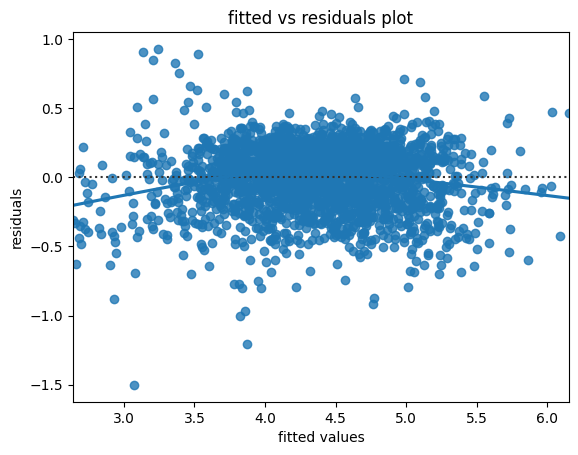

In [89]:
sns.residplot(
    data=df_pred, x='fitted values', y='residuals', lowess=True
)

plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.title('fitted vs residuals plot')
plt.show()

##### The curve is a straight line, which means there is no obvious pattern in this plot. We can say this is a linear model.

#### Check for normality

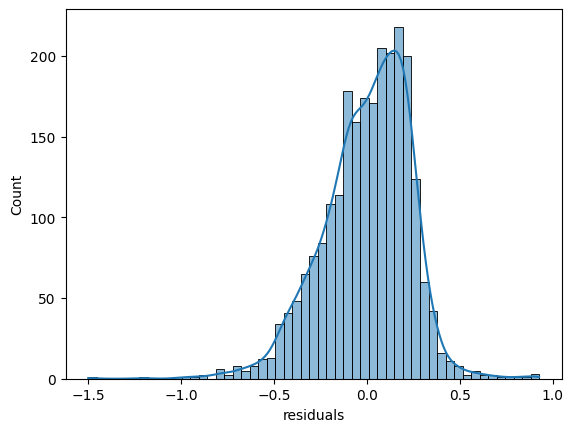

In [90]:
sns.histplot(data=df_pred,x='residuals',kde=True);

##### It's not exactly a strict normal distribution, and it's left skewed.

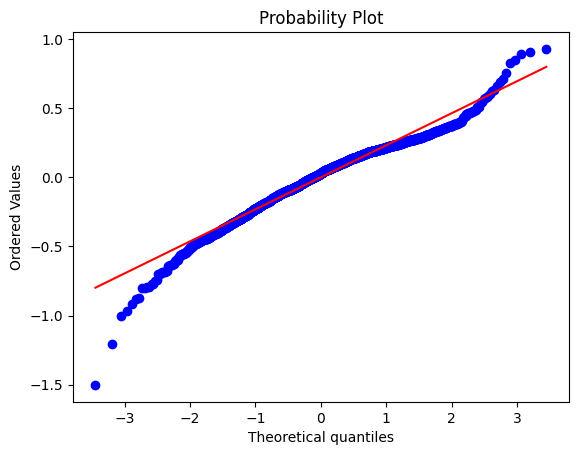

In [91]:
import scipy.stats as stats

stats.probplot(df_pred['residuals'], dist='norm',plot=plt);

##### Most of the points are on the line, yet the tails of both ends are not. We'll apply shapiro-wilk test next.

In [92]:
stats.shapiro(df_pred['residuals'])

ShapiroResult(statistic=0.9712618589401245, pvalue=1.2891344284503803e-21)

##### p-value < 0.05, the distribution of residuals is not being normal. But as an approximation ,we can take that this distribution is close to a normal one.

#### Check for homoscedasticity

In [93]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', "p-value"]
test = sms.het_goldfeldquandt(df_pred['residuals'], x_train)
lzip(name, test)

[('F statistic', 1.0642852240394296), ('p-value', 0.14038244821575666)]

##### P-value > 0.05, we can accept the null hypothesis of GQ test, which means the residuals are homoscedastic.

##### All the assumptions have been satisified.

## Final Model

In [94]:
olsres9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1556.
Date:                   Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                           18:32:59   Log-Likelihood:                 70.811
No. Observations:                   2417   AIC:                            -123.6
Df Residuals:                       2408   BIC:                            -71.51
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.3025      0.049     26.440      0.000       1.206       1.399
screen_size              0.0433      0.001     28.877      0.000       0.040       0.046
main_camera_mp           0.0188      0.001     14.008      0.000       0.016       0.021
selfie_camera_mp         0.0133      0.001     12.503      0.000       0.011       0.015
ram                      0.0160      0.004      3.694      0.000       0.007       0.024
days_used             6.347e-05   3.04e-05      2.085      0.037    3.77e-06       0.000
normalized_new_price     0.4252      0.011     39.425      0.000       0.404       0.446
years_released          -0.0193      0.004     -4.476      0.000      -0.028      -0.011
4g_yes                   0.0367      0.015      2.437      0.015       0.007       0.066
==============================================================================
Omnibus:                      222.446   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.959
Skew:                          -0.613   Prob(JB):                     3.19e-93
Kurtosis:                       4.652   Cond. No.                     7.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Observations:
##### 1.R-squared of this model is 0.838, and adjusted r-ssquared is 0.837. The model is able to explain 83.4% variance in the data, which is quite good.
##### 2.a unit increase in screen_size will result in a 0.0433 unit increase in the normalized used price of a device.
##### 3.a unite increase in main_camera_mp will result in a 0.0188 unit increase in the normalized used price of a device.
##### 4.a unite increase in selfie_camera_mp will result in a 0.0133 unit increase in the normalized used price of a device.
##### 5.a unite increase in ram will result in a 0.016 unit increase in the normalized used price of a device.
##### 6.a unite increase in days_used will result in a 6.347e-05 unit increase in the normalized used price of a device. 
##### 7.a unite increase in normalized_new_price will result in a 0.4252 unit increase in the normalized used price of a device. 
##### 8.if the device is 4g available, there will be a 0.0367 unite increase in the normalized used price of a device. Yet whether 5g is available, doesn't has a significant effect on the used price.
##### 9.a unite increse in years_leleased will result in a 0.0193 unite decrease in the normalized use price of a device.


## Model performance evaluation

In [95]:
olsres9.params

const                   1.302544
screen_size             0.043281
main_camera_mp          0.018817
selfie_camera_mp        0.013276
ram                     0.015980
days_used               0.000063
normalized_new_price    0.425211
years_released         -0.019295
4g_yes                  0.036711
dtype: float64

In [96]:
x_train.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram',
       'days_used', 'normalized_new_price', 'years_released', '4g_yes'],
      dtype='object')

In [97]:
x_test.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'battery', 'weight', 'days_used',
       'normalized_new_price', 'years_released', 'os_Others', 'os_Windows',
       'os_iOS', '4g_yes', '5g_yes'],
      dtype='object')

In [98]:
x_test.drop(['int_memory', 'battery', 'weight', 'os_Others', 'os_Windows', 'os_iOS', '5g_yes'], axis=1, inplace=True)

In [99]:
y_pred = olsres9.predict(x_test)

In [100]:
rmse1 = np.sqrt(mean_squared_error(df_pred['actual values'], df_pred['fitted values']))
rmse1

0.2349845284533095

In [101]:
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

0.2387353870889849

In [102]:
mae1 = mean_absolute_error(df_pred['actual values'], df_pred['fitted values'])
mae1

0.18414326066124745

In [103]:
mae2 = mean_absolute_error(y_test, y_pred)
mae2

0.18438683841701253

##### 1.RMSE on the train and test data are comparable. SO our model is not overfitting.
##### 2.Our model can predict used price with a mean error of 0.18 units on the test data.
##### 3.Our model olsres9 is a good one to predict the normalized used price of a device.

## Actionable Insights and Recommendations

##### 1.Top three traits that decide the price of a used price are: the screen size of the device, the original price of the model, and wheather 4g is available.  It's always a good idea to prioritize the acquisition of an expensive model, with a large screen size and available 4g. Most of the big screen devices are from Honor, Huawei, Lava, Lenovo, LG, Nokia,Oneplus, Oppo,Samsung, Vivo,Xiaomi, Apple, Asus, Acer, Alcatel, Realme. Among those brands, Realme only produce big screen devices, the least screen size of a Realme device is 6 inches.
##### 2.Besides, the resolution of the rear and front camera, the RAM ,the release year also have some effects on the normalizd used price. Devices that have a better resolution of the rear and front camera, a larger RAM, a later release time, are good ones to acquisite and trade.
##### 3.The market is dominated by a 4GB RAM devices（82%）. So if a device's RAM is 4GB or above, then it's good.
##### 4.The days of usage by the last owner has very minor effect on the used price. And the postive correlation between it and the price of the used device is a bit counterintuitive. It might be people tends to own a high-end device longer. When it comes to the price of a used device, the qualitity is always a critical consideration. So even it's been used for a longer time, yet since it has better quality, it can still has a better price for resell.
##### 5.the battery,the weight of a device,the type of its operation system, whether 5g is available, barely efffect the used price of a device, compared with the above traits. 
##### 6. 93% of used device market is dominated by Android devices. The brand name is not as important as the other traits when making a price for a used device.
##### 7.ReCell can consider those factors when buying and selling secondhand devices, give priorities to the most important traits according to its budget.

___